## This is the 2-layer neural network notebook for ECE C147/C247 Homework #3

Please follow the notebook linearly to implement a two layer neural network.

Please print out the notebook entirely when completed.

The goal of this notebook is to give you experience with training a two layer neural network.

In [110]:
import random
import numpy as np
from utils.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Toy example

Before loading CIFAR-10, there will be a toy example to test your implementation of the forward and backward pass. Make sure to read the description of TwoLayerNet class in neural_net.py file , understand the architecture and initializations

In [111]:
from nndl.neural_net import TwoLayerNet

In [112]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

### Compute forward pass scores

In [113]:
## Implement the forward pass of the neural network.
## See the loss() method in TwoLayerNet class for the same

# Note, there is a statement if y is None: return scores, which is why 
# the following call will calculate the scores.
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
    [-1.07260209,  0.05083871, -0.87253915],
    [-2.02778743, -0.10832494, -1.52641362],
    [-0.74225908,  0.15259725, -0.39578548],
    [-0.38172726,  0.10835902, -0.17328274],
    [-0.64417314, -0.18886813, -0.41106892]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-1.07260209  0.05083871 -0.87253915]
 [-2.02778743 -0.10832494 -1.52641362]
 [-0.74225908  0.15259725 -0.39578548]
 [-0.38172726  0.10835902 -0.17328274]
 [-0.64417314 -0.18886813 -0.41106892]]

correct scores:
[[-1.07260209  0.05083871 -0.87253915]
 [-2.02778743 -0.10832494 -1.52641362]
 [-0.74225908  0.15259725 -0.39578548]
 [-0.38172726  0.10835902 -0.17328274]
 [-0.64417314 -0.18886813 -0.41106892]]

Difference between your scores and correct scores:
3.3812311957259755e-08


### Forward pass loss

In [114]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.071696123862817

# should be very small, we get < 1e-12
print("Loss:",loss)
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Loss: 1.071696123862817
Difference between your loss and correct loss:
0.0


### Backward pass

Implements the backwards pass of the neural network.  Check your gradients with the gradient check utilities provided.

In [115]:
from utils.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('{} max relative error: {}'.format(param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 2.9632233460136427e-10
b2 max relative error: 1.8392017135950213e-10
W1 max relative error: 1.28328951808708e-09
b1 max relative error: 3.172680285697327e-09


### Training the network

Implement neural_net.train() to train the network via stochastic gradient descent, much like the softmax and SVM.

Final training loss:  0.014498902952971729


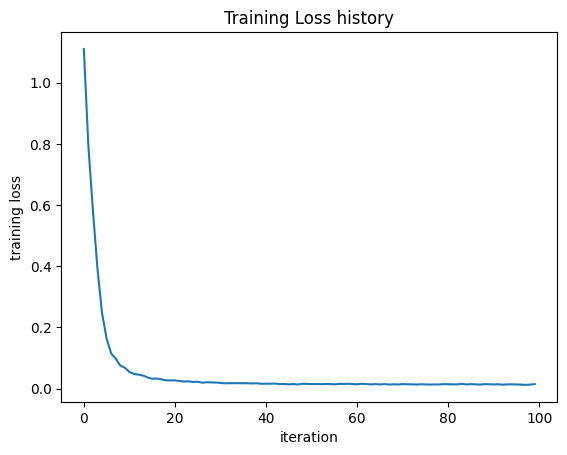

In [116]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

## Classify CIFAR-10

Do classification on the CIFAR-10 dataset.

In [117]:
from utils.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. 
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = '/Users/wangyuchen/desktop/COM SCI 247/HW/HW2/hw2_Questions/code/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


### Running SGD

If your implementation is correct, you should see a validation accuracy of around 28-29%.

In [118]:
from nndl.neural_net import TwoLayerNet
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

# Save this net as the variable subopt_net for later comparison.
subopt_net = net

iteration 0 / 1000: loss 2.302757518613176
iteration 100 / 1000: loss 2.302120159207236
iteration 200 / 1000: loss 2.2956136007408703
iteration 300 / 1000: loss 2.2518259043164135
iteration 400 / 1000: loss 2.188995235046776
iteration 500 / 1000: loss 2.1162527791897743
iteration 600 / 1000: loss 2.064670827698217
iteration 700 / 1000: loss 1.9901688623083942
iteration 800 / 1000: loss 2.002827640124685
iteration 900 / 1000: loss 1.9465176817856495
Validation accuracy:  0.283


## Questions:

The training accuracy isn't great.  

(1) What are some of the reasons why this is the case?  Take the following cell to do some analyses and then report your answers in the cell following the one below.

(2) How should you fix the problems you identified in (1)?


In [119]:
stats['train_acc_history']

[0.095, 0.15, 0.25, 0.25, 0.315]

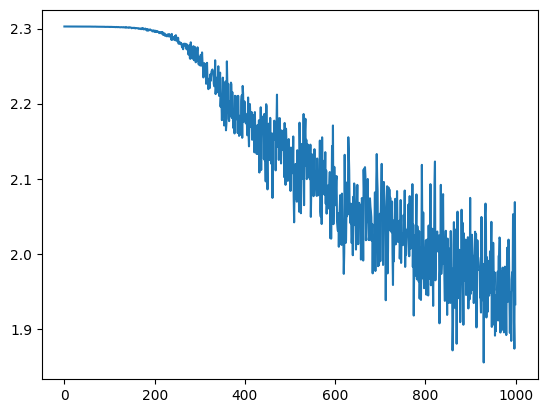

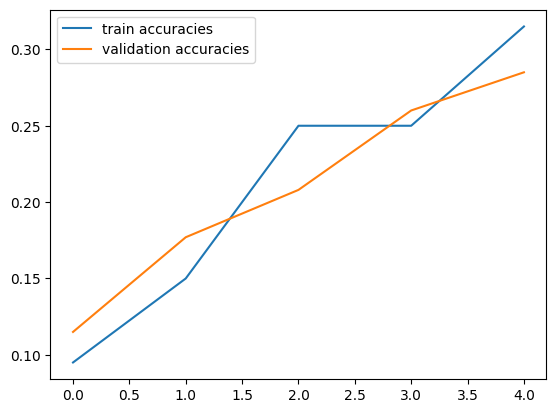

In [120]:
# ================================================================ #
# YOUR CODE HERE:
#   Do some debugging to gain some insight into why the optimization
#   isn't great.
# ================================================================ #

# Plot the loss function and train / validation accuracies

#plot the loss function
plt.plot(stats['loss_history'])
plt.show()

#plot the train / validation accuracies
#plot the train accuracies
plt.plot(stats['train_acc_history'], label = "train accuracies") 
#plot the validation accuracies
plt.plot(stats['val_acc_history'], label = "validation accuracies")
plt.legend() #show the labels
plt.show()


# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #

## Answers:

(1) First of all, it seems like the learning rate is not large enough since the loss in the first graph barely changes during the first 200 iterations. Also, the changes of loss is still unpredictable and the loss function does not go flatten. So, the number of iterations is not enough. On the other hand, the patters of train accuracy and validation accuracy do not match.

(2) Based on my answer to the first question, I will try to increase the learning rate and number of iterations. 

## Optimize the neural network

Use the following part of the Jupyter notebook to optimize your hyperparameters on the validation set.  Store your nets as best_net.

In [121]:
best_net = None # store the best model into this 

# ================================================================ #
# YOUR CODE HERE:
#   Optimize over your hyperparameters to arrive at the best neural
#   network.  You should be able to get over 50% validation accuracy.
#   For this part of the notebook, we will give credit based on the
#   accuracy you get.  Your score on this question will be multiplied by:
#      min(floor((X - 28%)) / %22, 1) 
#   where if you get 50% or higher validation accuracy, you get full
#   points.
#
#   Note, you need to use the same network structure (keep hidden_size = 50)!
# ================================================================ #

# Train the network by changing the learning rate

input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10

learningrates = [1e-5, 1e-4, 1e-3] #checking different learning rate

currentbestacc = 0

for rate in learningrates:
    currentnet = TwoLayerNet(input_size, hidden_size, num_classes)
    print("Current learning rate: ", rate)
    currentstats = currentnet.train(X_train, y_train, X_val, y_val,
                num_iters=6000, batch_size=200, 
                #increase the number of iterations from 1000 to 6000
                learning_rate=rate, learning_rate_decay=0.95,
                reg=0.25, verbose=True)
    
    # Predict on the validation set
    currentval_acc = (currentnet.predict(X_val) == y_val).mean()
    print('Validation accuracy: ', currentval_acc)
    
    #when we detect a better accuracy, update it
    if currentval_acc > currentbestacc: 
        currentbestacc = currentval_acc
        best_net = currentnet #update the best net
    
#As we can see that when we have learning rate = 1e-3 and 6000 iterations,
#the validation accuracy is 0.525, which is higher than 0.5

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
val_acc = (best_net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

Current learning rate:  1e-05
iteration 0 / 6000: loss 2.3027667167979295
iteration 100 / 6000: loss 2.3027299318867556
iteration 200 / 6000: loss 2.3027045062357443
iteration 300 / 6000: loss 2.3027105833127006
iteration 400 / 6000: loss 2.302681593506126
iteration 500 / 6000: loss 2.302660027738356
iteration 600 / 6000: loss 2.3026070348816576
iteration 700 / 6000: loss 2.3025672488781286
iteration 800 / 6000: loss 2.302511043748264
iteration 900 / 6000: loss 2.3025020673744923
iteration 1000 / 6000: loss 2.302416327991673
iteration 1100 / 6000: loss 2.3022083751559155
iteration 1200 / 6000: loss 2.3022747409308537
iteration 1300 / 6000: loss 2.30219325838239
iteration 1400 / 6000: loss 2.3018614049182693
iteration 1500 / 6000: loss 2.3015019270228256
iteration 1600 / 6000: loss 2.301536483683131
iteration 1700 / 6000: loss 2.301767713274723
iteration 1800 / 6000: loss 2.300709678050533
iteration 1900 / 6000: loss 2.301290650219527
iteration 2000 / 6000: loss 2.3010291716275875
itera

iteration 5400 / 6000: loss 1.339260275949583
iteration 5500 / 6000: loss 1.421995477196877
iteration 5600 / 6000: loss 1.3917825384468079
iteration 5700 / 6000: loss 1.2260269411811262
iteration 5800 / 6000: loss 1.2792045580344877
iteration 5900 / 6000: loss 1.3274046520061757
Validation accuracy:  0.508
Validation accuracy:  0.508


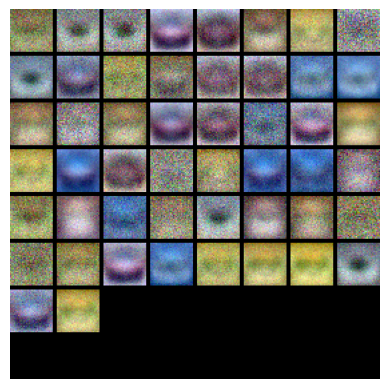

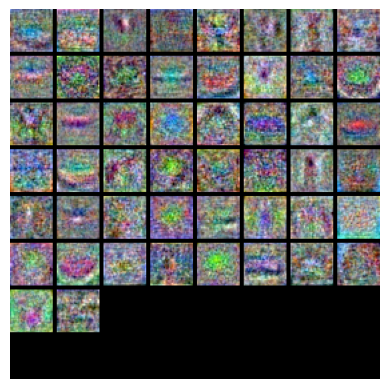

In [122]:
from utils.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.T.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(subopt_net)
show_net_weights(best_net)

## Question:

(1) What differences do you see in the weights between the suboptimal net and the best net you arrived at?

## Answer:

(1) In the best net, it is easier to recognize the specific shapes or feature, where the suboptimal net has much more noises.

## Evaluate on test set 

In [123]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.507
